In [3]:
import pandas as pd
import seaborn as sns

### Data Collection

In [7]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv


In [9]:
df_train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')

### Data analysis

In [11]:
import matplotlib.pyplot as plt
(df_train)

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,two,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,two,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,two,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,one,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,two,438,108,0,0,0,0,0,0,3,2006.0,167240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,4,1,7.0,0,-1.0,zero,0,0,192,0,0,0,0,0,11,2008.0,130000
1130,3,1,6.0,0,1964.0,two,504,0,0,0,0,0,0,0,7,2008.0,145000
1294,3,1,7.0,1,1996.0,three,889,220,0,0,0,0,0,0,7,2009.0,265000


In [13]:
df=df_train
df.shape

(1168, 17)

**Insight:**


The dataset contains 1168 rows and 17 columns.

In [15]:
print("Sample of the dataset:")
df.sample(10)

Sample of the dataset:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
648,4,1,7.0,0,1916.0,three,513,0,0,96,0,0,0,0,5,2008.0,98000
1416,1,1,4.0,0,2003.0,two,420,140,0,0,0,0,0,0,5,2009.0,140000
230,3,1,7.0,2,1973.0,two,484,235,204,228,0,0,0,350,11,2009.0,200000
357,4,1,9.0,1,1996.0,three,666,283,86,0,0,0,0,0,3,2010.0,410000
276,2,1,5.0,2,1954.0,two,439,81,0,0,0,0,0,0,4,2008.0,241500
947,3,1,6.0,0,2001.0,two,528,0,45,0,0,0,0,0,11,2009.0,227000
791,3,1,8.0,0,2003.0,two,543,0,63,0,0,0,0,0,7,2008.0,224900
893,2,1,7.0,1,2009.0,three,478,195,130,0,0,0,0,0,10,2009.0,370878
760,2,1,5.0,1,1978.0,two,588,168,180,0,0,0,0,0,6,2007.0,194000


**Insight:**


- Missing or Erroneous Data: The GarageYrBlt column has a value of -1.0, which suggests missing or erroneous data that needs to be addressed.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 164.2

In [19]:
df[df.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


**Insight:**


- The dataset contains three missing values.
- The data types are predominantly integer (int64) with 3 columns being a float (float64) and one column (GarageCars) object.

In [21]:
df.bfill(axis=0,inplace=True)

In [23]:
import numpy as np
df_replaced = df.replace(-1, np.nan)
df = df_replaced.bfill()

In [25]:
print("\nSummary Statistics:")
print(f"Number different values per column\n{df.nunique()}")
df.describe()


Summary Statistics:
Number different values per column
BedroomAbvGr       8
KitchenAbvGr       3
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       97
GarageCars         5
GarageArea       387
WoodDeckSF       242
OpenPorchSF      184
EnclosedPorch    105
3SsnPorch         15
ScreenPorch       66
PoolArea           6
MiscVal           19
MoSold            12
YrSold             5
SalePrice        571
dtype: int64


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,2.872432,1.043664,6.496575,0.607877,1977.863014,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2007.801370,179163.845890
std,0.805929,0.212653,1.618230,0.630833,24.883070,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,1.327295,76848.682649
min,0.000000,1.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1960.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1979.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2001.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


**Insight:**

- BedroomAbvGr: The mean is approximately 3, since the std is small, we can assume that the number of bedrooms in most houses is close to three.
- KitchenAbvGr: Similar to the bedroom data,we can assume that the number of kitchen in most houses is close to one.
- TotRmsAbvGrd：The standard deviation is slightly larger than the previous two data points, indicating that this data shows some variability. Therefore, we can infer that the total number of rooms is most likely between 5 and 7.
- Fireplaces: About 40% of the houses do not have a fireplace, while 60% of the houses have one fireplace
- GarageYrBlt&GarageArea: Most garages were built quite a long time ago, and there is a significant variation in garage sizes..
- Porch:More than half of the houses do not have a wood deck , and over three-quarters of the houses do not have an enclosed porch, a 3-season porch, or a screen porch，also pool 
- Time: The purchase time is not strongly correlated with the month, but it is mainly concentrated between the years 2006 and 2010.

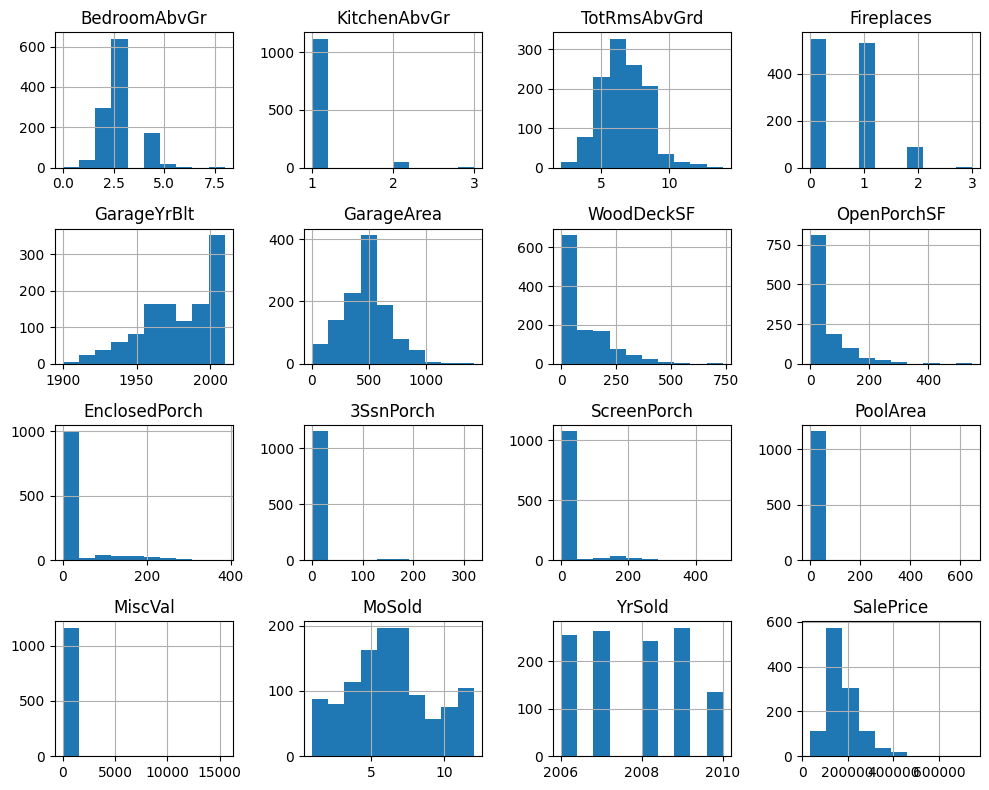

In [27]:
df.hist(figsize=(10, 8))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

**Insight:**

- BedroomAbvGr：The majority of houses have 3 bedrooms, followed by those with 2 bedrooms.
- KitchenAbvGr：The majority of houses have one kitchen.
- TotRmsAbvGrd：The total number of rooms ranges between 5 and 8, with 6-room houses being the most common.
- GarageYrBlt & GarageArea：The majority of garages were built after the year 2000, and their area is mostly around 500 square feet.
- Porch & pool & Misc：The vast majority of houses do not have any type of porch, pool, or miscellaneous features.
- Time：The majority of houses are purchased in the summer, with the rest of the year being fairly evenly distributed，and were purchased between 2006          and 2010, with little fluctuation from year to year.
- Price：The majority of houses are sold for less than $200,000, with a small number of high-priced homes (over $500,000).

In [33]:
df=df.replace("one",1)
df=df.replace("two",2)
df=df.replace("three",3)
df=df.replace("zero",0)
df=df.replace("four",4)
df

C:\Users\13163\AppData\Local\Temp\ipykernel_83744\2070035016.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace("four",4)


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,2,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,2,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,2,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,1,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,2,438,108,0,0,0,0,0,0,3,2006.0,167240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,4,1,7.0,0,1964.0,0,0,0,192,0,0,0,0,0,11,2008.0,130000
1130,3,1,6.0,0,1964.0,2,504,0,0,0,0,0,0,0,7,2008.0,145000
1294,3,1,7.0,1,1996.0,3,889,220,0,0,0,0,0,0,7,2009.0,265000



Box plots to check for outliers:


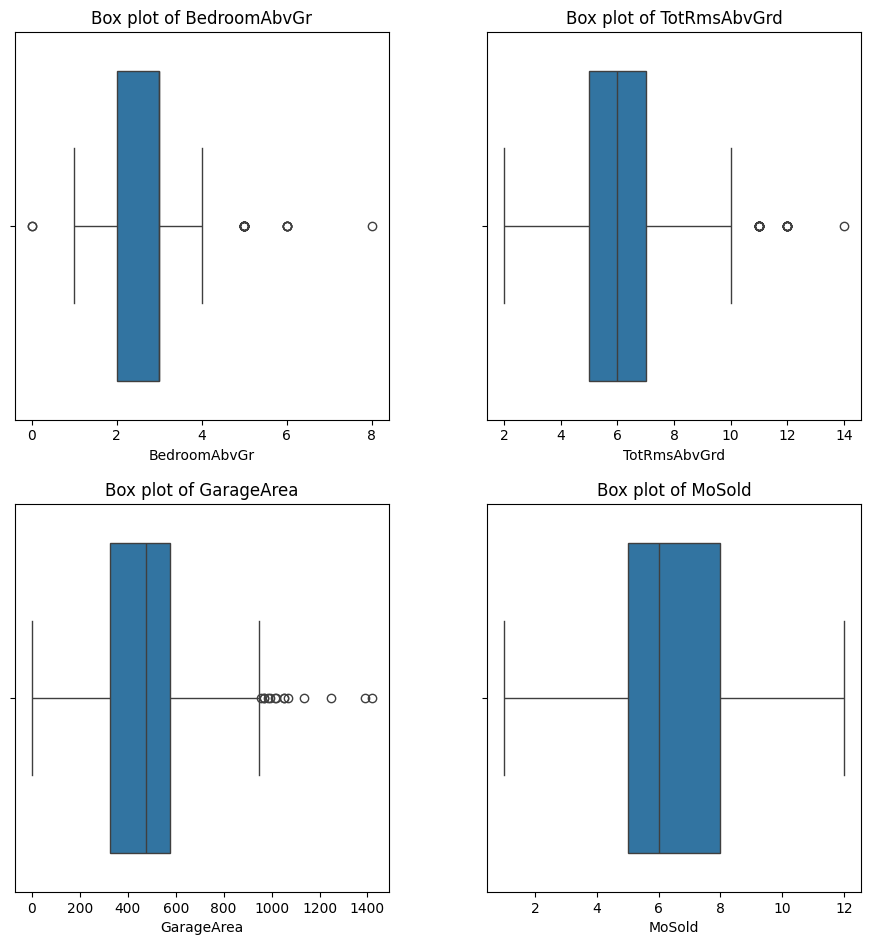

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\nBox plots to check for outliers:")
numeric_cols = ["BedroomAbvGr", "TotRmsAbvGrd", "GarageArea", "MoSold"]

# Set up the plot grid
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows*5))
fig.tight_layout(pad=4.0)

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_pos = i % n_cols
    sns.boxplot(x=df[col], ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Box plot of {col}')

# Remove empty subplots if the number of columns is odd
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()

**Insight:**

1.bedroom:

- The distribution of number of bedrooms shows some outliers, particularly at the higher end (around 4-8).
- The median age is around 3, and most of the number of bedrooms are between 2 and 3.

2.totalrooms:
  
- The distribution of number of bedrooms shows some outliers, particularly at the higher end (around 11-14).
- The median age is around 6, and most of the number of bedrooms are between 5 and 7.

3.Garage Area:
  
-  The distribution of number of bedrooms shows some outliers, particularly at the higher end (around 1000-1400).
-  The median age is around 6, and most of the number of bedrooms are between 300 and 600.


Correlation matrix:


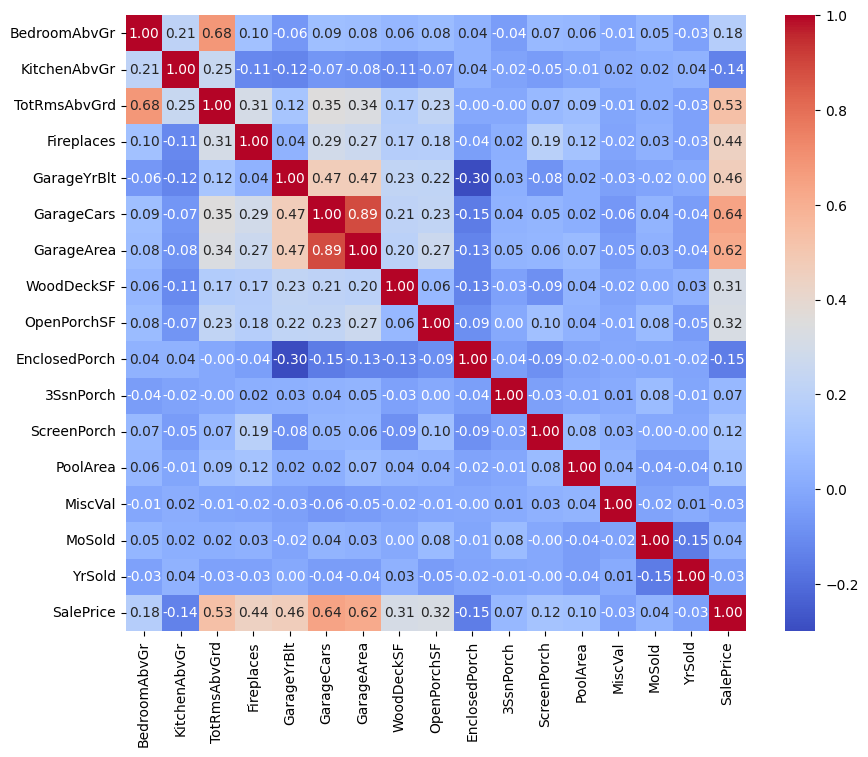

In [35]:
print("\nCorrelation matrix:")
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

1.sex:

- positive correlation with totrmsAbvGrd (+0.68): because TotrmAbvgrd is the sum of the rooms

2.TotrmsAbvgrd:

- positive correlation with Pricesale (+0.53): Houses with more rooms tend to sell for a good price.

3.fireplaces:

- positive correlation with Pricesale (+0.44): Fireplaces can add more value to a house.

4.GarageYrBlt&GarageCars&FarageArea：

- All positive correlation with Pricesale (+0.46,+0.64,+0.62):The newer the garage, the more size of garage in car capacity, the larger its area, and the higher the value of the house.



Important correlations with 'SalePrice:


Text(0.5, 1.0, 'Top Negative Correlations')

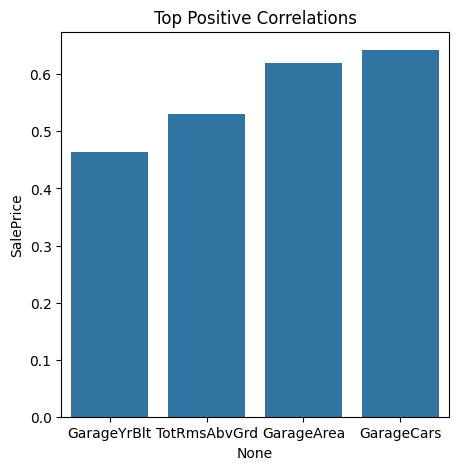

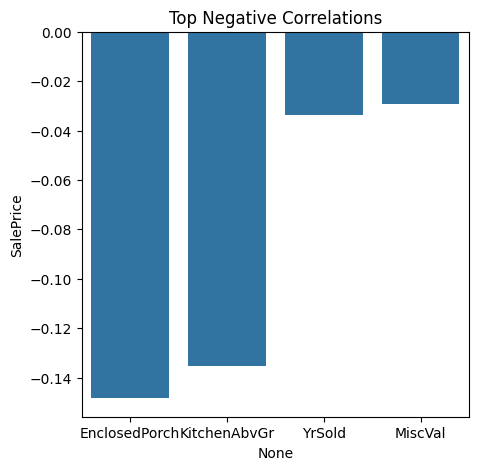

In [31]:
print("\nImportant correlations with 'SalePrice:")
corrs = df.corr().sort_values(by=['SalePrice'])['SalePrice'].iloc[:-1]
corrs_max = corrs[-4:]
corrs_min = corrs[:4]
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_max.index, y = corrs_max)
plt.title("Top Positive Correlations")
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_min.index, y = corrs_min)
plt.title("Top Negative Correlations")


Pairplot of selected features:


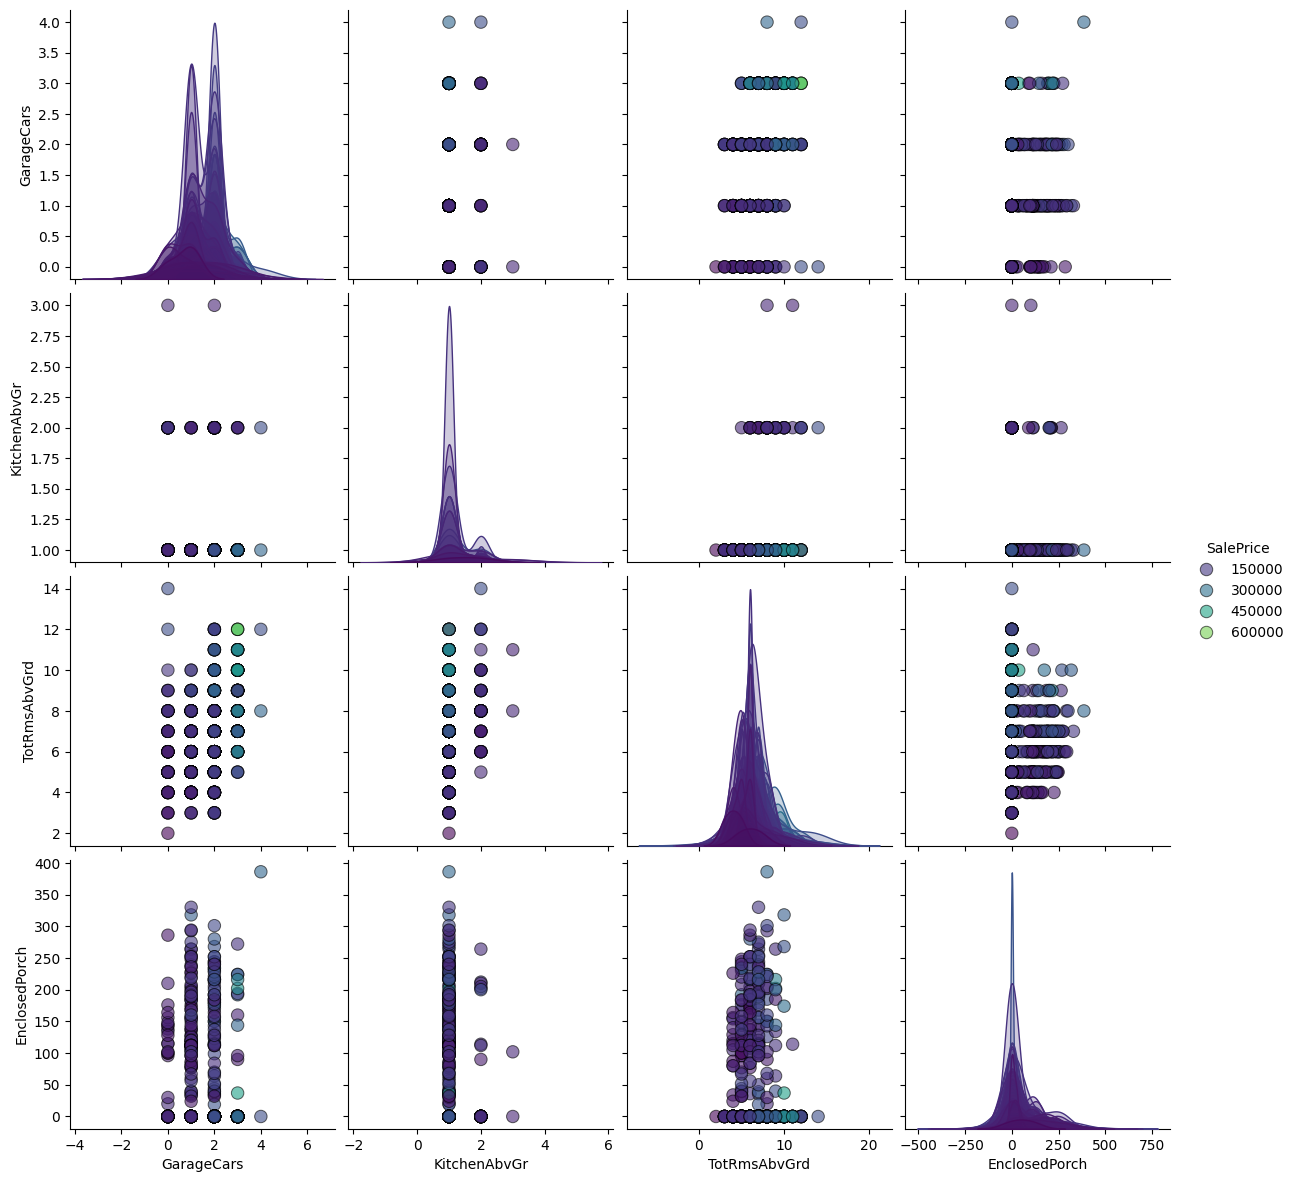